## Setting up all imports and figure designs

In [2]:
#CHECK IF ALL NEEDED

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

#ignore warnings
import warnings

warnings.filterwarnings('ignore')

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import pandas as pd


# to make this notebook's output stable across runs
np.random.seed(42)

# To plot figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import seaborn as sns

# Where to save the figures    CHANGE THIS!!!!
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
# Import the classifiers, performance measures, and gridsearch for hyperparameter training.   CHANGE IF NEEDED!!!!
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

## Pre-processing and data exploration

In [3]:
#Read in the dataset using pandas dataframe, view first few records
df=pd.read_csv(r"diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#Discover the main information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
#Describe the whole dataset, use averages to understand the data values
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
#Discover any null values as describe shows all columns have minimum values of 0
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
 #Count the types of values in the 'y' label column
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

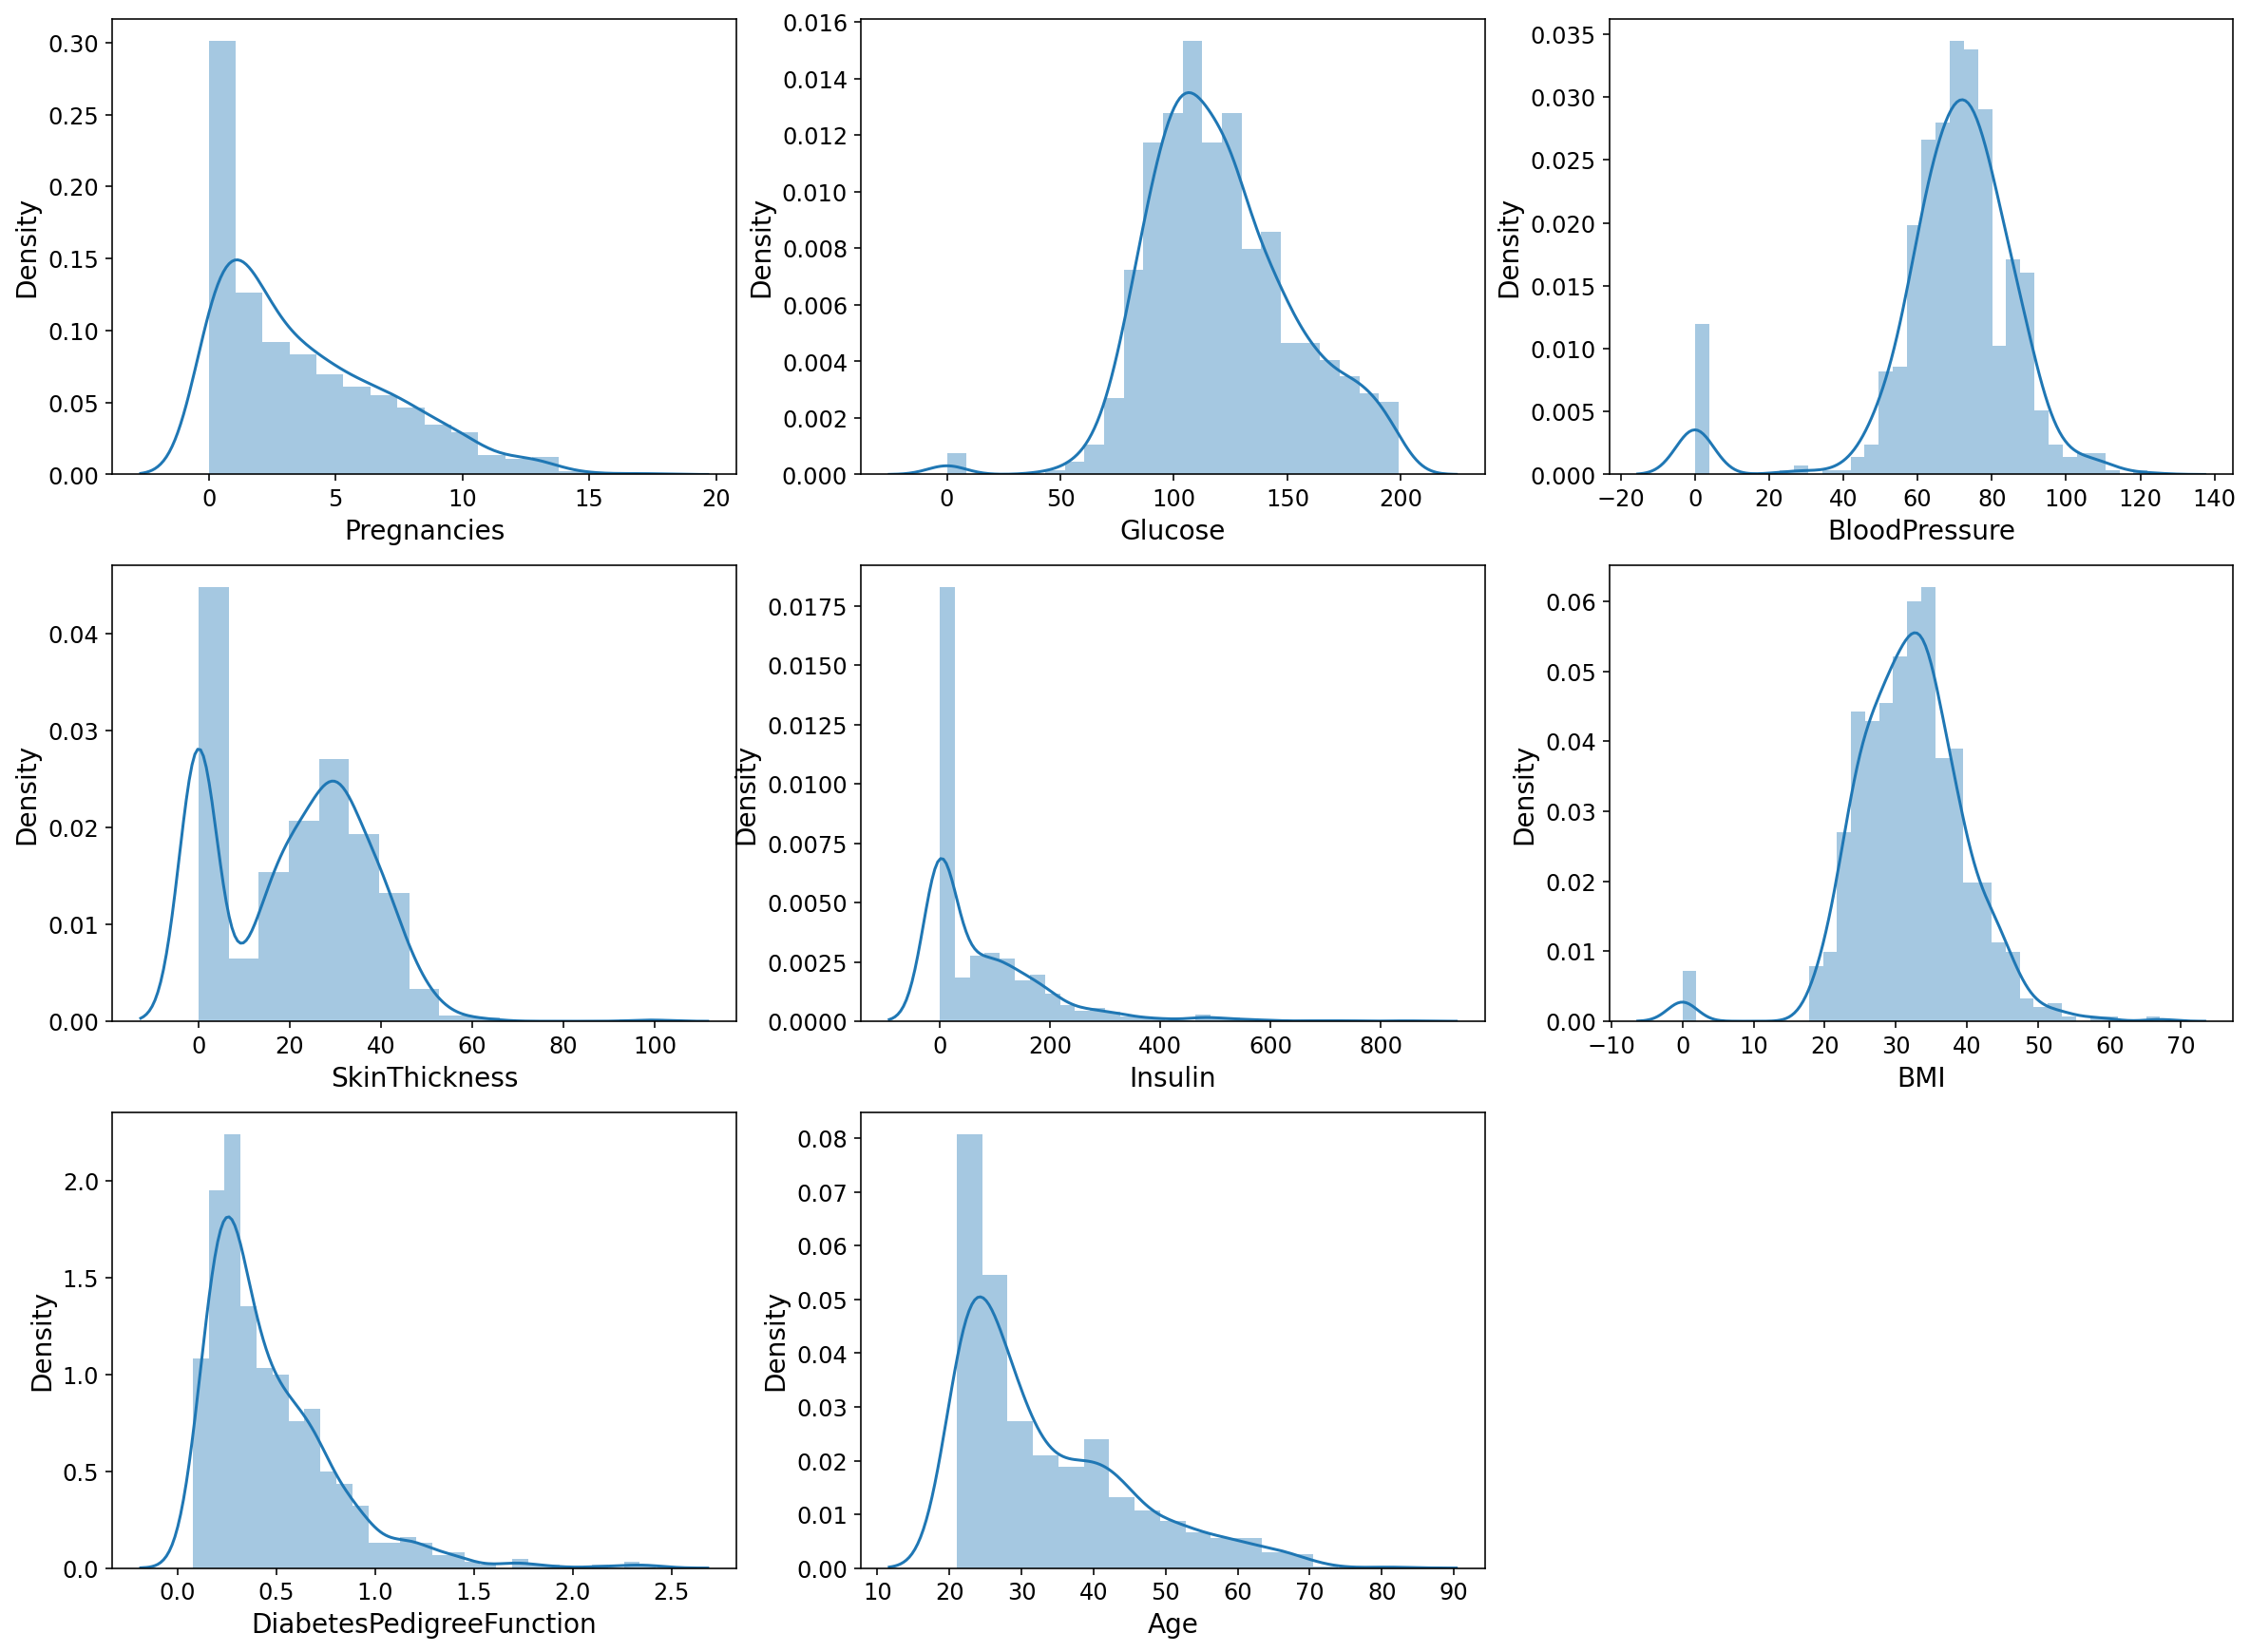

<Figure size 432x288 with 0 Axes>

In [8]:
#check distributions
%matplotlib inline

plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.distplot(df['Pregnancies'])
plt.subplot(3,3,2)
sns.distplot(df['Glucose'])
plt.subplot(3,3,3)
sns.distplot(df['BloodPressure'])
plt.subplot(3,3,4)
sns.distplot(df['SkinThickness'])
plt.subplot(3,3,5)
sns.distplot(df['Insulin'])
plt.subplot(3,3,6)
sns.distplot(df['BMI'])
plt.subplot(3,3,7)
sns.distplot(df['DiabetesPedigreeFunction'])
plt.subplot(3,3,8)
sns.distplot(df['Age'])
plt.show()
plt.savefig('distribution.png')

#shows that logistic regression could be used as most variables show a binomial or linear distribution

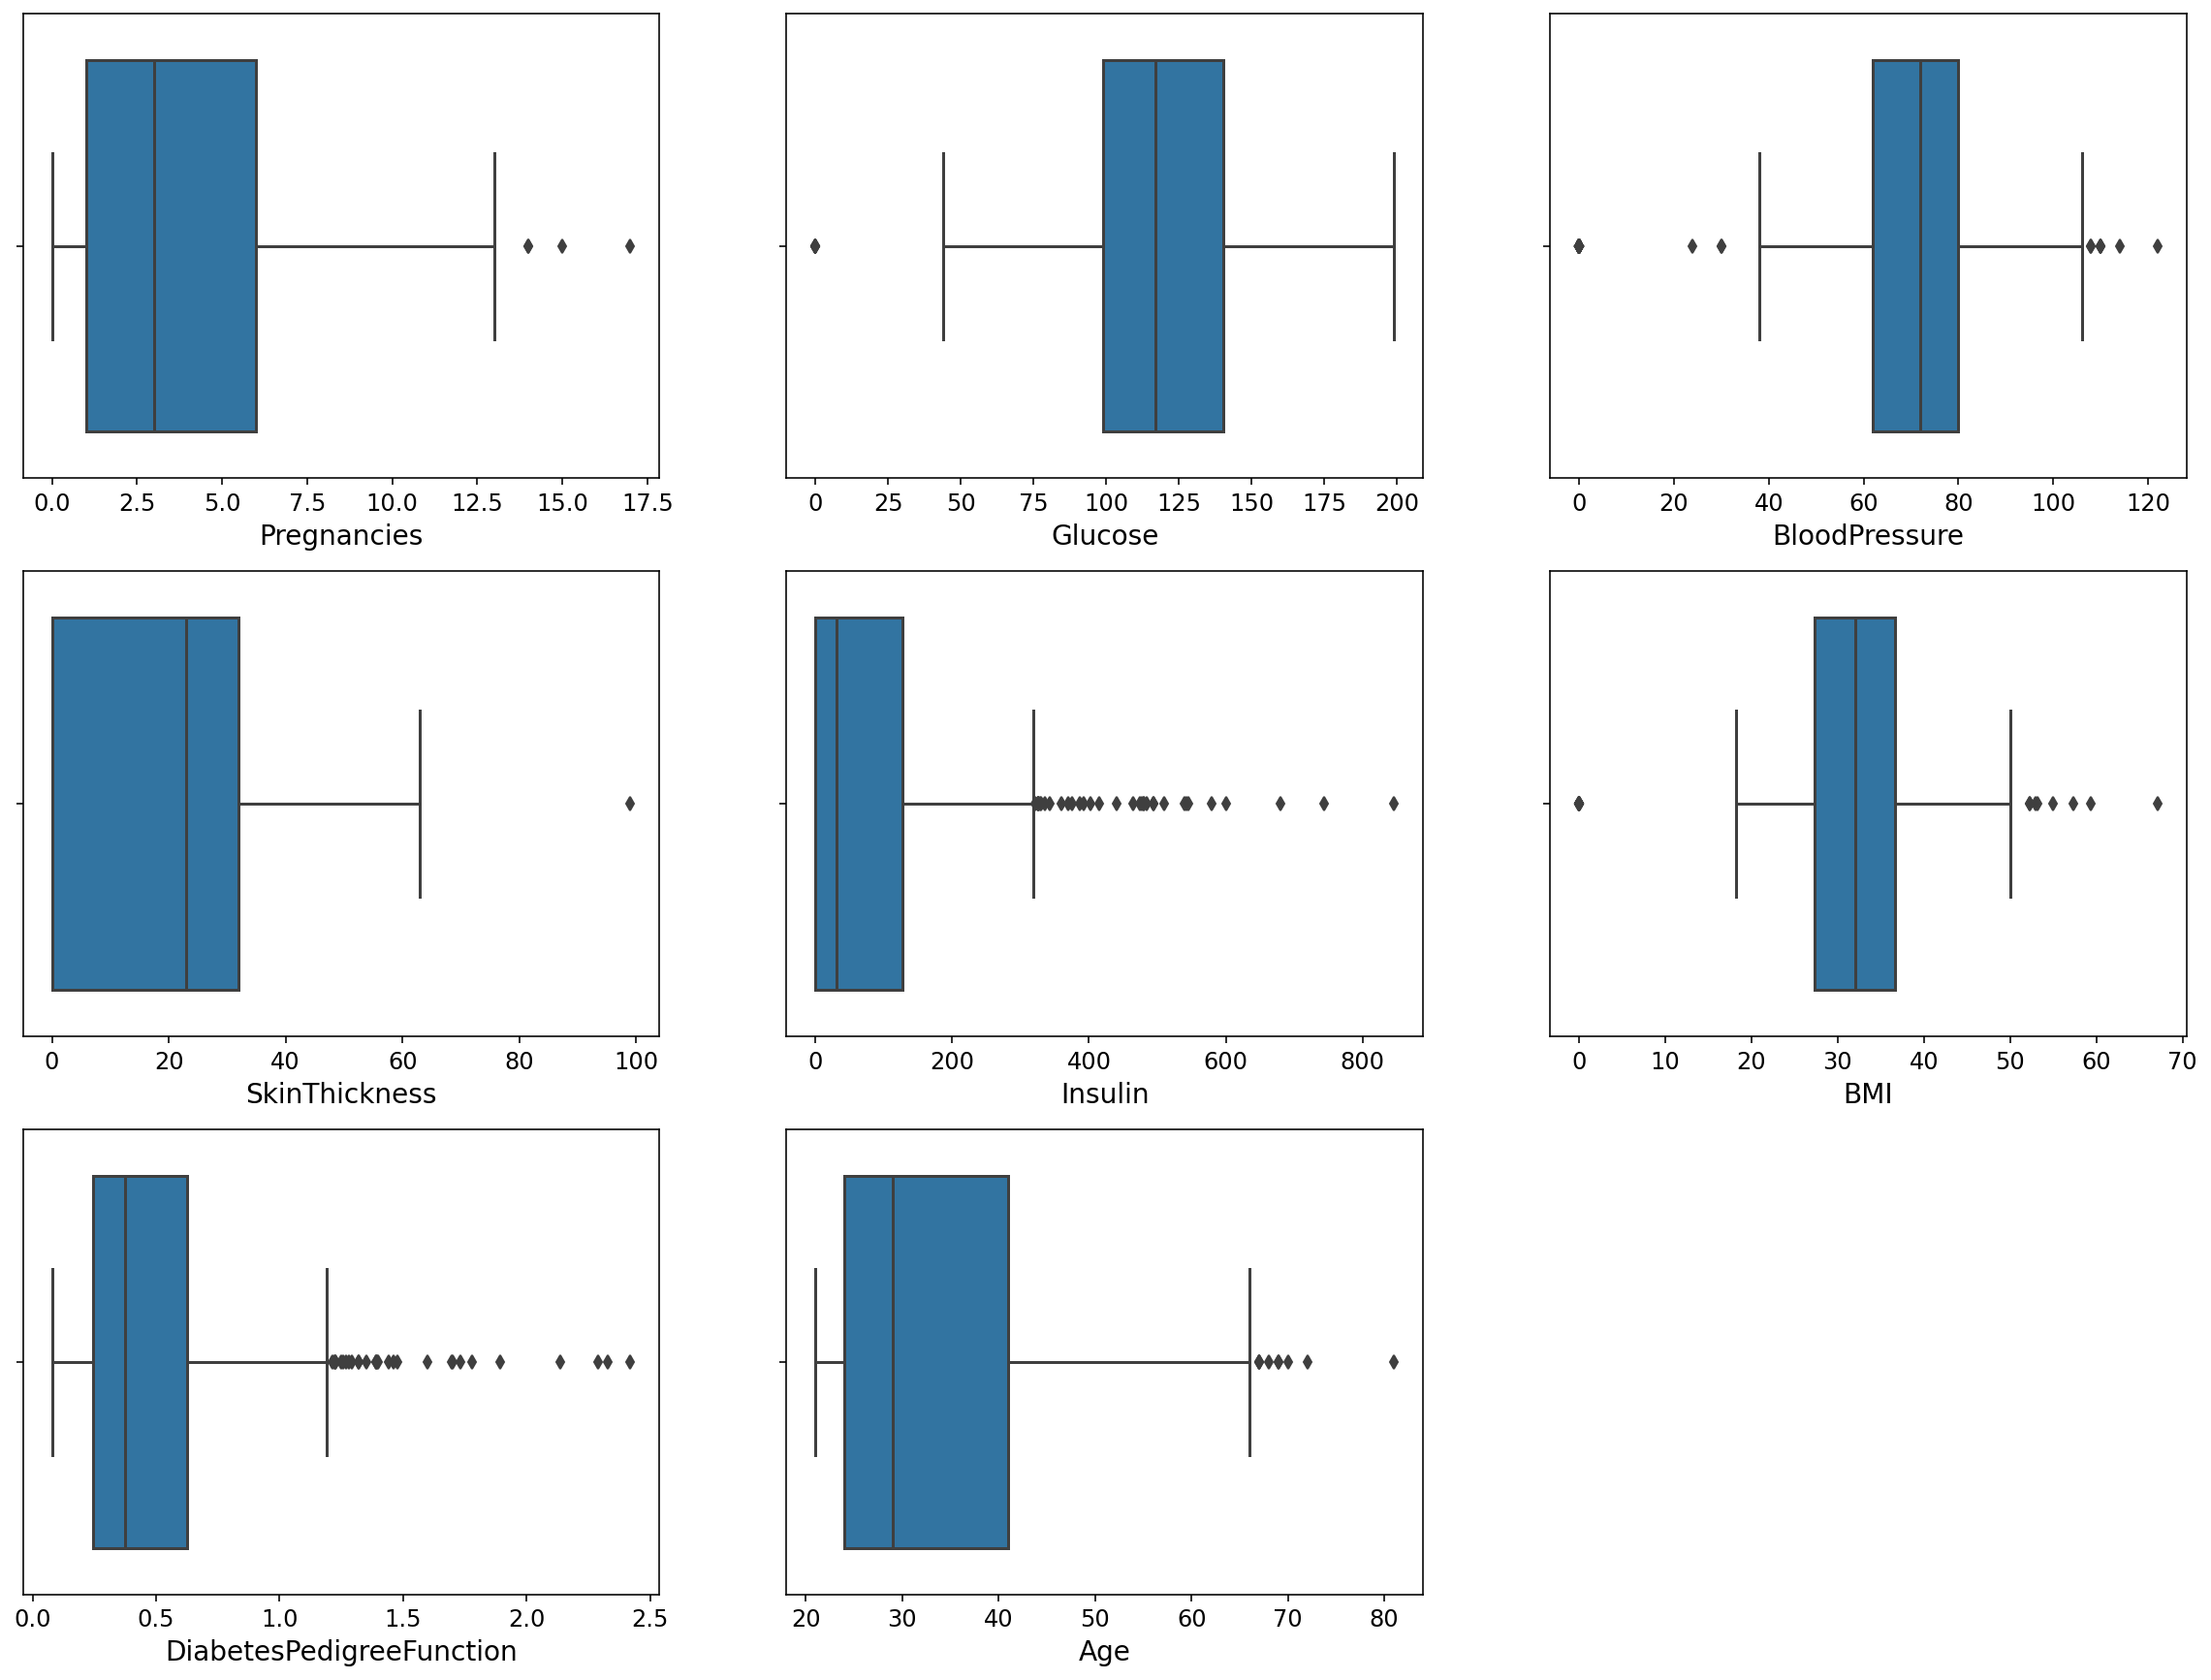

<Figure size 432x288 with 0 Axes>

In [9]:
#Check if any outliers are present 
%matplotlib inline

plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.boxplot(df['Pregnancies'])
plt.subplot(3,3,2)
sns.boxplot(df['Glucose'])
plt.subplot(3,3,3)
sns.boxplot(df['BloodPressure'])
plt.subplot(3,3,4)
sns.boxplot(df['SkinThickness'])
plt.subplot(3,3,5)
sns.boxplot(df['Insulin'])
plt.subplot(3,3,6)
sns.boxplot(df['BMI'])
plt.subplot(3,3,7)
sns.boxplot(df['DiabetesPedigreeFunction'])
plt.subplot(3,3,8)
sns.boxplot(df['Age'])
plt.show()
plt.savefig('boxplots.png')

In [10]:
# Outliers are present in each feature but small dataset so make them equal to upper and lower limits

def fixoutliers(df,column):
    IQR = df[column].quantile(0.75) - df[column].quantile(0.25)
    UpperL = (1.5 * IQR) + df[column].quantile(0.75)
    LowerL = df[column].quantile(0.25) - (1.5 * IQR)
    df[column][df[column] >  UpperL] = UpperL
    df[column][df[column] < LowerL] = LowerL
    
for i in df.columns:
    fixoutliers(df, i)

In [11]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128987,0.184307,-0.084349,-0.077793,0.024681,-0.017398,0.549695,0.220392
Glucose,0.128987,1.000000,0.197865,0.059806,0.315856,0.235542,0.120213,0.269056,0.479158
BloodPressure,0.184307,0.197865,1.000000,0.152644,0.050080,0.282544,0.038793,0.304208,0.113301
SkinThickness,-0.084349,0.059806,0.152644,1.000000,0.488101,0.401494,0.177920,-0.119170,0.073125
Insulin,-0.077793,0.315856,0.050080,0.488101,1.000000,0.209665,0.190087,-0.065547,0.124721
BMI,0.024681,0.235542,0.282544,0.401494,0.209665,1.000000,0.141087,0.043375,0.309739
DiabetesPedigreeFunction,-0.017398,0.120213,0.038793,0.177920,0.190087,0.141087,1.000000,0.047289,0.184969
Age,0.549695,0.269056,0.304208,-0.119170,-0.065547,0.043375,0.047289,1.000000,0.242702
Outcome,0.220392,0.479158,0.113301,0.073125,0.124721,0.309739,0.184969,0.242702,1.000000


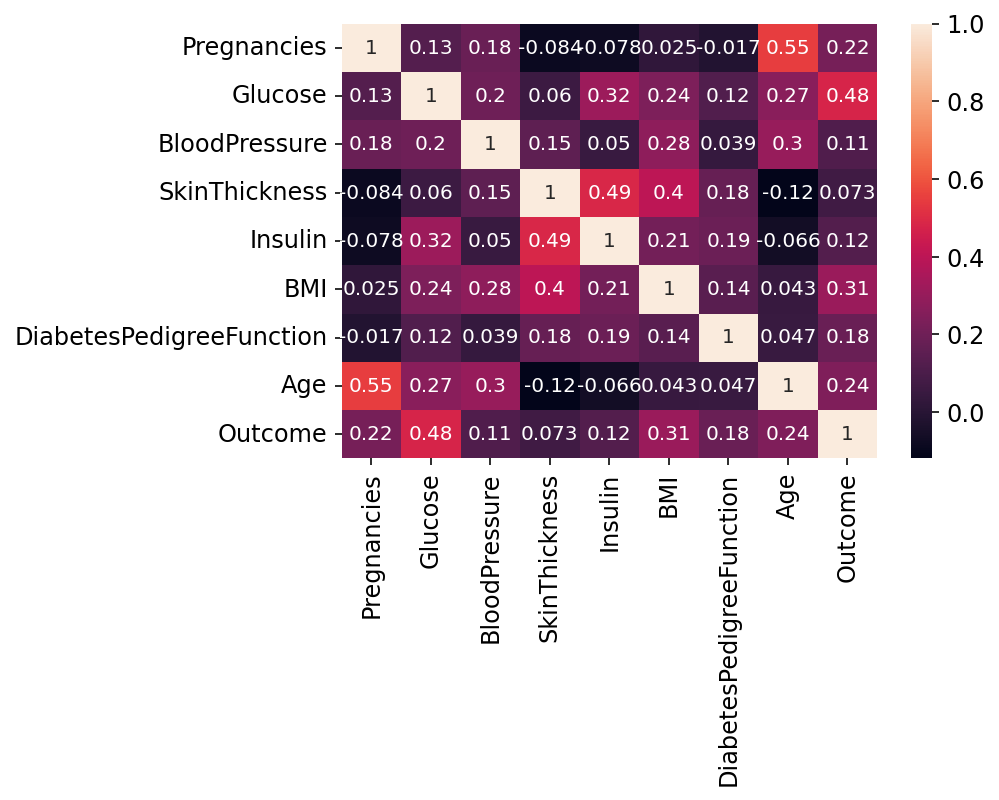

In [12]:
#Correlation study to indicate if all variables are relevant
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [13]:
#Split test and training data

dfoutcome = df['Outcome']
dfvariables = df[['Pregnancies','Glucose', 'BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]

X_train, X_test, y_train, y_test  = train_test_split(dfvariables, dfoutcome, test_size=0.2, random_state=42)

## SVM

In [14]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [15]:
from sklearn import metrics

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
svmacc = metrics.accuracy_score(y_test, y_pred)

# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))
svmprec = metrics.precision_score(y_test, y_pred)

# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))
svmrec = metrics.recall_score(y_test, y_pred)

Accuracy: 0.7662337662337663
Precision: 0.6792452830188679
Recall: 0.6545454545454545


## K-nearest neighbours

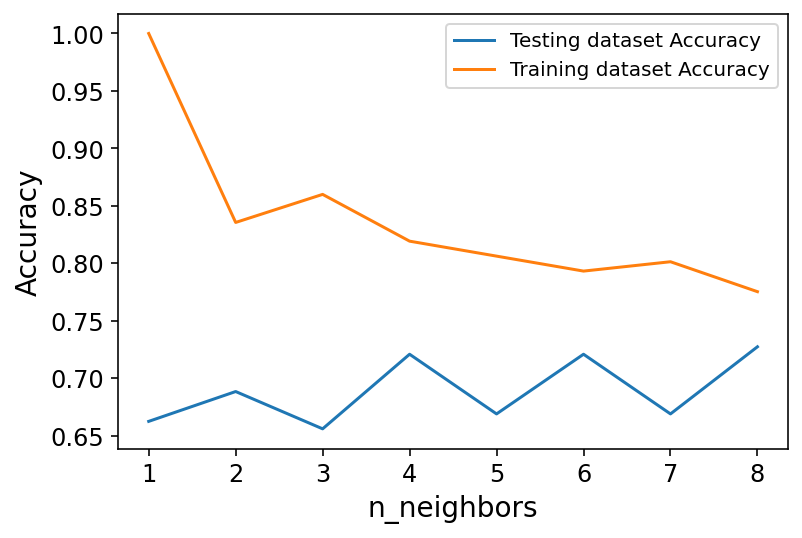

[0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 1
 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0]


In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

# plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

knn = KNeighborsClassifier(n_neighbors=8)
 
knn.fit(X_train, y_train)
 
# Predict on dataset that model has not seen before
y_pred = knn.predict(X_test)
print(y_pred)

In [17]:
#accuracy
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print('Accuracy: ' ,knn.score(X_test,y_test))
knnacc = knn.score(X_test,y_test)
print('Precision: ' ,precision_score(y_test,y_pred, average='binary'))
knnprec = precision_score(y_test,y_pred, average='binary')
print('Recall: ', recall_score(y_test,y_pred, average='binary'))
knnrec = recall_score(y_test,y_pred, average='binary')

Accuracy:  0.7272727272727273
Precision:  0.6274509803921569
Recall:  0.5818181818181818


## Logistic regression

In [18]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

y_pred=logreg.predict(X_test)

In [19]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[82, 17],
       [18, 37]])

Text(0.5, 257.44, 'Predicted label')

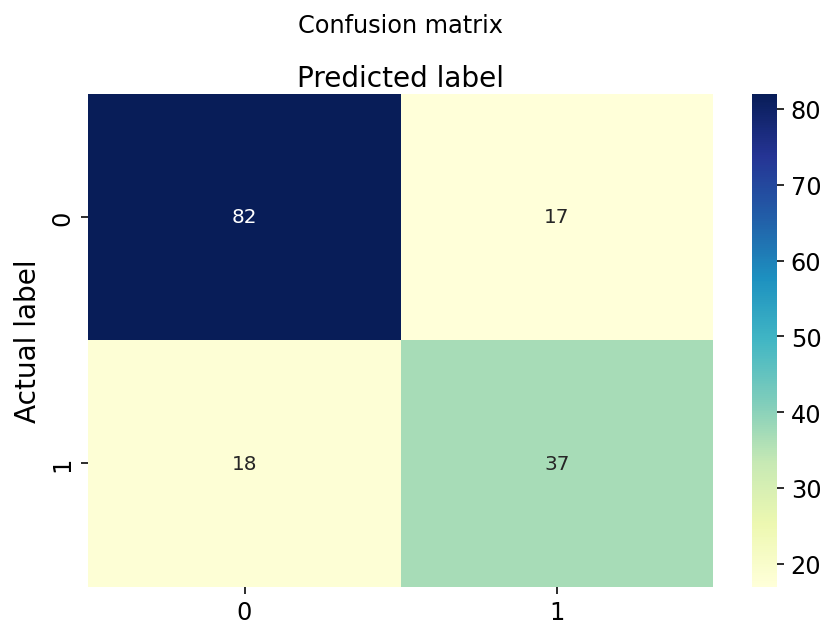

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [21]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
lracc = metrics.accuracy_score(y_test, y_pred)
print("Precision:",metrics.precision_score(y_test, y_pred))
lrprec = metrics.precision_score(y_test, y_pred)
print("Recall:",metrics.recall_score(y_test, y_pred))
lrrec = metrics.recall_score(y_test, y_pred)

Accuracy: 0.7727272727272727
Precision: 0.6851851851851852
Recall: 0.6727272727272727


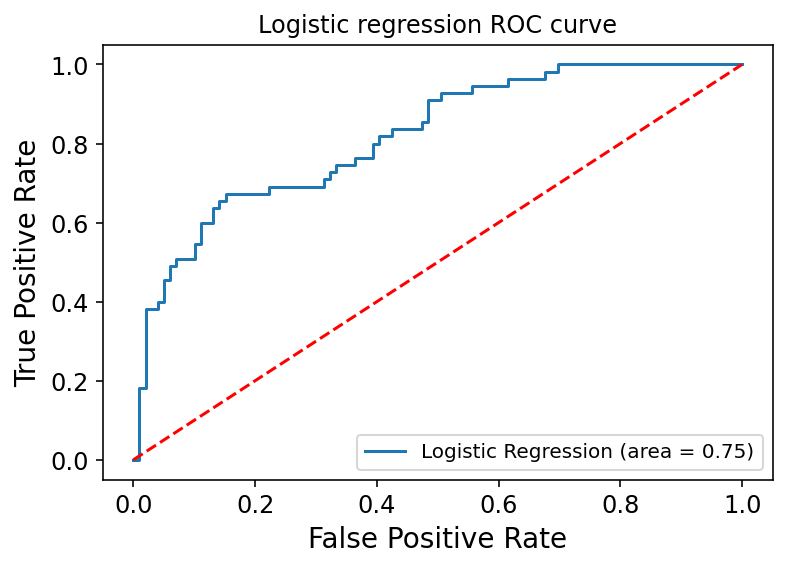

In [23]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic regression ROC curve')
plt.legend(loc="lower right")
plt.show()

## Decision trees

In [23]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
#pre-pruning used for max depth, improved accuracy

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [24]:
# Model metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
dtacc = metrics.accuracy_score(y_test, y_pred)
print("Precision:",metrics.precision_score(y_test, y_pred))
dtprec = metrics.precision_score(y_test, y_pred)
print("Recall:",metrics.recall_score(y_test, y_pred))
dtrec = metrics.recall_score(y_test, y_pred)

Accuracy: 0.7662337662337663
Precision: 0.6862745098039216
Recall: 0.6363636363636364


## Artificial neural network


In [39]:
#Importing necessary Libraries
import numpy as np
import pandas as pd
import tensorflow as tf

#Initialising ANN
ann = tf.keras.models.Sequential()
#Adding First Hidden Layer
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

#Adding Second Hidden Layer
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

#Adding Output Layer
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

#Compiling ANN
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy','Precision','Recall'])

#Fitting ANN
annfitted = ann.fit(X_train,y_train,batch_size=32,epochs = 100)

Epoch 1/100


 1/20 [>.............................] - ETA: 28s - loss: 4.2358 - accuracy: 0.5938 - precision: 0.0000e+00 - recall: 0.0000e+00

 7/20 [=========>....................] - ETA: 0s - loss: 3.8101 - accuracy: 0.5536 - precision: 0.1892 - recall: 0.0909         

20/20 [==============================] - 2s 4ms/step - loss: 3.5183 - accuracy: 0.5423 - precision: 0.2792 - recall: 0.2019


Epoch 2/100
 1/20 [>.............................] - ETA: 1s - loss: 3.0999 - accuracy: 0.5625 - precision: 0.4000 - recall: 0.3333

16/20 [=======================>......] - ETA: 0s - loss: 3.0033 - accuracy: 0.5234 - precision: 0.3114 - recall: 0.2873

20/20 [==============================] - 0s 6ms/step - loss: 2.8672 - accuracy: 0.5309 - precision: 0.3057 - recall: 0.2770


Epoch 3/100
 1/20 [>.............................] - ETA: 0s - loss: 2.7072 - accuracy: 0.5000 - precision: 0.2500 - recall: 0.1667

 3/20 [===>..........................] - ETA: 0s - loss: 2.5573 - accuracy: 0.5104 - precision: 0.2308 - recall: 0.1818

16/20 [=======================>......] - ETA: 0s - loss: 2.4531 - accuracy: 0.5215 - precision: 0.3046 - recall: 0.2473

20/20 [==============================] - 0s 10ms/step - loss: 2.3482 - accuracy: 0.5342 - precision: 0.3048 - recall: 0.2676


Epoch 4/100
 1/20 [>.............................] - ETA: 0s - loss: 2.8002 - accuracy: 0.4375 - precision: 0.2500 - recall: 0.2500

10/20 [==============>...............] - ETA: 0s - loss: 1.9536 - accuracy: 0.5375 - precision: 0.2936 - recall: 0.3107

20/20 [==============================] - 0s 6ms/step - loss: 1.9590 - accuracy: 0.5489 - precision: 0.3242 - recall: 0.2770


Epoch 5/100
 1/20 [>.............................] - ETA: 0s - loss: 1.8597 - accuracy: 0.5938 - precision: 0.4545 - recall: 0.4167

 3/20 [===>..........................] - ETA: 0s - loss: 1.7599 - accuracy: 0.6146 - precision: 0.5000 - recall: 0.4054

14/20 [====================>.........] - ETA: 0s - loss: 1.7364 - accuracy: 0.5670 - precision: 0.3799 - recall: 0.4503

20/20 [==============================] - 0s 10ms/step - loss: 1.7307 - accuracy: 0.5472 - precision: 0.3673 - recall: 0.4225


Epoch 6/100
 1/20 [>.............................] - ETA: 0s - loss: 1.0984 - accuracy: 0.5312 - precision: 0.3529 - recall: 0.6000

 6/20 [========>.....................] - ETA: 0s - loss: 1.5991 - accuracy: 0.5521 - precision: 0.3288 - recall: 0.3934

20/20 [==============================] - 0s 5ms/step - loss: 1.5981 - accuracy: 0.5749 - precision: 0.3750 - recall: 0.3380


Epoch 7/100
 1/20 [>.............................] - ETA: 1s - loss: 2.0854 - accuracy: 0.5312 - precision: 0.2500 - recall: 0.1818

14/20 [====================>.........] - ETA: 0s - loss: 1.5568 - accuracy: 0.5446 - precision: 0.3554 - recall: 0.3782

20/20 [==============================] - 0s 6ms/step - loss: 1.4834 - accuracy: 0.5537 - precision: 0.3668 - recall: 0.3944


Epoch 8/100
 1/20 [>.............................] - ETA: 0s - loss: 1.0839 - accuracy: 0.5625 - precision: 0.2727 - recall: 0.3333

 5/20 [======>.......................] - ETA: 0s - loss: 1.2189 - accuracy: 0.5875 - precision: 0.3922 - recall: 0.3636

20/20 [==============================] - ETA: 0s - loss: 1.3960 - accuracy: 0.5798 - precision: 0.3923 - recall: 0.3850

20/20 [==============================] - 0s 10ms/step - loss: 1.3960 - accuracy: 0.5798 - precision: 0.3923 - recall: 0.3850


Epoch 9/100
 1/20 [>.............................] - ETA: 0s - loss: 2.1462 - accuracy: 0.5312 - precision: 0.7000 - recall: 0.3684

12/20 [=================>............] - ETA: 0s - loss: 1.3779 - accuracy: 0.5807 - precision: 0.3438 - recall: 0.3636

16/20 [=======================>......] - ETA: 0s - loss: 1.3466 - accuracy: 0.5820 - precision: 0.3706 - recall: 0.3706

20/20 [==============================] - ETA: 0s - loss: 1.3347 - accuracy: 0.5814 - precision: 0.3922 - recall: 0.3756

20/20 [==============================] - 0s 26ms/step - loss: 1.3347 - accuracy: 0.5814 - precision: 0.3922 - recall: 0.3756


Epoch 10/100
 1/20 [>.............................] - ETA: 0s - loss: 1.3205 - accuracy: 0.5938 - precision: 0.3333 - recall: 0.4444

 3/20 [===>..........................] - ETA: 0s - loss: 1.1686 - accuracy: 0.6146 - precision: 0.5000 - recall: 0.4865

 8/20 [===========>..................] - ETA: 0s - loss: 1.2337 - accuracy: 0.5625 - precision: 0.3723 - recall: 0.3977

13/20 [==================>...........] - ETA: 0s - loss: 1.1987 - accuracy: 0.5938 - precision: 0.4028 - recall: 0.4113

17/20 [========================>.....] - ETA: 0s - loss: 1.2829 - accuracy: 0.5662 - precision: 0.3807 - recall: 0.3968

20/20 [==============================] - 0s 21ms/step - loss: 1.2655 - accuracy: 0.5668 - precision: 0.3812 - recall: 0.3991


Epoch 11/100
 1/20 [>.............................] - ETA: 0s - loss: 0.8561 - accuracy: 0.6562 - precision: 0.4286 - recall: 0.6667

 8/20 [===========>..................] - ETA: 0s - loss: 1.2741 - accuracy: 0.5742 - precision: 0.4066 - recall: 0.4022

17/20 [========================>.....] - ETA: 0s - loss: 1.2458 - accuracy: 0.5699 - precision: 0.3883 - recall: 0.3802

20/20 [==============================] - 0s 10ms/step - loss: 1.2037 - accuracy: 0.5782 - precision: 0.3915 - recall: 0.3897


Epoch 12/100
 1/20 [>.............................] - ETA: 0s - loss: 1.0231 - accuracy: 0.5938 - precision: 0.5385 - recall: 0.5000

 5/20 [======>.......................] - ETA: 0s - loss: 1.2328 - accuracy: 0.5437 - precision: 0.4355 - recall: 0.4154

15/20 [=====================>........] - ETA: 0s - loss: 1.1807 - accuracy: 0.5688 - precision: 0.3734 - recall: 0.3533

20/20 [==============================] - 0s 11ms/step - loss: 1.1472 - accuracy: 0.5831 - precision: 0.3909 - recall: 0.3615


Epoch 13/100
 1/20 [>.............................] - ETA: 0s - loss: 0.9157 - accuracy: 0.5938 - precision: 0.4545 - recall: 0.4167

 2/20 [==>...........................] - ETA: 1s - loss: 0.9637 - accuracy: 0.6094 - precision: 0.4737 - recall: 0.3750

10/20 [==============>...............] - ETA: 0s - loss: 1.0637 - accuracy: 0.5969 - precision: 0.4324 - recall: 0.4211

19/20 [===========================>..] - ETA: 0s - loss: 1.1101 - accuracy: 0.5789 - precision: 0.3897 - recall: 0.3971

20/20 [==============================] - 0s 15ms/step - loss: 1.1149 - accuracy: 0.5782 - precision: 0.3935 - recall: 0.3991


Epoch 14/100
 1/20 [>.............................] - ETA: 0s - loss: 0.7043 - accuracy: 0.6562 - precision: 0.3636 - recall: 0.5000

 7/20 [=========>....................] - ETA: 0s - loss: 1.0351 - accuracy: 0.5982 - precision: 0.4000 - recall: 0.3377

13/20 [==================>...........] - ETA: 0s - loss: 1.0594 - accuracy: 0.6010 - precision: 0.4167 - recall: 0.3819

16/20 [=======================>......] - ETA: 0s - loss: 1.0406 - accuracy: 0.5898 - precision: 0.3977 - recall: 0.3886

19/20 [===========================>..] - ETA: 0s - loss: 1.0599 - accuracy: 0.5872 - precision: 0.4058 - recall: 0.3962

20/20 [==============================] - 0s 21ms/step - loss: 1.0564 - accuracy: 0.5863 - precision: 0.4019 - recall: 0.3944


Epoch 15/100
 1/20 [>.............................] - ETA: 1s - loss: 0.9896 - accuracy: 0.6250 - precision: 0.4167 - recall: 0.5000

 5/20 [======>.......................] - ETA: 0s - loss: 0.9851 - accuracy: 0.6375 - precision: 0.3409 - recall: 0.3409

 9/20 [============>.................] - ETA: 0s - loss: 0.8715 - accuracy: 0.6528 - precision: 0.3649 - recall: 0.3375

13/20 [==================>...........] - ETA: 0s - loss: 0.9451 - accuracy: 0.6418 - precision: 0.4407 - recall: 0.3852

17/20 [========================>.....] - ETA: 0s - loss: 0.9866 - accuracy: 0.6121 - precision: 0.4268 - recall: 0.3743

20/20 [==============================] - 0s 21ms/step - loss: 1.0288 - accuracy: 0.5928 - precision: 0.4041 - recall: 0.3662


Epoch 16/100
 1/20 [>.............................] - ETA: 1s - loss: 0.8750 - accuracy: 0.6250 - precision: 0.8000 - recall: 0.2667

 9/20 [============>.................] - ETA: 0s - loss: 0.9332 - accuracy: 0.6181 - precision: 0.4583 - recall: 0.4314

17/20 [========================>.....] - ETA: 0s - loss: 0.9722 - accuracy: 0.6011 - precision: 0.4225 - recall: 0.4202

20/20 [==============================] - 0s 11ms/step - loss: 0.9889 - accuracy: 0.5928 - precision: 0.4106 - recall: 0.3991


Epoch 17/100
 1/20 [>.............................] - ETA: 1s - loss: 1.0673 - accuracy: 0.6250 - precision: 0.2727 - recall: 0.4286

15/20 [=====================>........] - ETA: 0s - loss: 0.9474 - accuracy: 0.6000 - precision: 0.4247 - recall: 0.3647

20/20 [==============================] - 0s 6ms/step - loss: 0.9599 - accuracy: 0.6059 - precision: 0.4208 - recall: 0.3615


Epoch 18/100


 1/20 [>.............................] - ETA: 0s - loss: 0.9216 - accuracy: 0.6562 - precision: 0.4444 - recall: 0.4000

 2/20 [==>...........................] - ETA: 1s - loss: 0.8493 - accuracy: 0.6406 - precision: 0.3158 - recall: 0.3750

17/20 [========================>.....] - ETA: 0s - loss: 0.9413 - accuracy: 0.6140 - precision: 0.4459 - recall: 0.3627

20/20 [==============================] - 0s 10ms/step - loss: 0.9323 - accuracy: 0.6124 - precision: 0.4309 - recall: 0.3662


Epoch 19/100


 1/20 [>.............................] - ETA: 0s - loss: 0.8332 - accuracy: 0.5938 - precision: 0.3333 - recall: 0.6250

 6/20 [========>.....................] - ETA: 0s - loss: 0.9845 - accuracy: 0.5469 - precision: 0.3944 - recall: 0.3889

19/20 [===========================>..] - ETA: 0s - loss: 0.8962 - accuracy: 0.6086 - precision: 0.4254 - recall: 0.3649

20/20 [==============================] - 0s 10ms/step - loss: 0.8926 - accuracy: 0.6091 - precision: 0.4262 - recall: 0.3662


Epoch 20/100
 1/20 [>.............................] - ETA: 0s - loss: 0.8342 - accuracy: 0.7500 - precision: 0.4000 - recall: 0.2857

12/20 [=================>............] - ETA: 0s - loss: 0.8782 - accuracy: 0.6042 - precision: 0.4417 - recall: 0.3841

20/20 [==============================] - 0s 6ms/step - loss: 0.8644 - accuracy: 0.6156 - precision: 0.4385 - recall: 0.3850


Epoch 21/100


 1/20 [>.............................] - ETA: 0s - loss: 1.1137 - accuracy: 0.5312 - precision: 0.2500 - recall: 0.1818

15/20 [=====================>........] - ETA: 0s - loss: 0.8074 - accuracy: 0.6167 - precision: 0.4295 - recall: 0.3926

20/20 [==============================] - 0s 6ms/step - loss: 0.8401 - accuracy: 0.6075 - precision: 0.4271 - recall: 0.3850


Epoch 22/100


 1/20 [>.............................] - ETA: 1s - loss: 0.9214 - accuracy: 0.4688 - precision: 0.2222 - recall: 0.1667

10/20 [==============>...............] - ETA: 0s - loss: 0.7421 - accuracy: 0.6719 - precision: 0.5263 - recall: 0.3670

20/20 [==============================] - 0s 6ms/step - loss: 0.8249 - accuracy: 0.6254 - precision: 0.4520 - recall: 0.3756


Epoch 23/100
 1/20 [>.............................] - ETA: 0s - loss: 0.7320 - accuracy: 0.6250 - precision: 0.6000 - recall: 0.4286

 2/20 [==>...........................] - ETA: 1s - loss: 0.8144 - accuracy: 0.5938 - precision: 0.5200 - recall: 0.4815

15/20 [=====================>........] - ETA: 0s - loss: 0.8076 - accuracy: 0.6292 - precision: 0.4532 - recall: 0.3818

20/20 [==============================] - 0s 10ms/step - loss: 0.7997 - accuracy: 0.6254 - precision: 0.4514 - recall: 0.3709


Epoch 24/100
 1/20 [>.............................] - ETA: 0s - loss: 0.7350 - accuracy: 0.6875 - precision: 0.1667 - recall: 0.1667

 6/20 [========>.....................] - ETA: 0s - loss: 0.7747 - accuracy: 0.6406 - precision: 0.4792 - recall: 0.3433

20/20 [==============================] - 0s 6ms/step - loss: 0.7879 - accuracy: 0.6124 - precision: 0.4352 - recall: 0.3944


Epoch 25/100


 1/20 [>.............................] - ETA: 0s - loss: 0.9237 - accuracy: 0.5312 - precision: 0.4000 - recall: 0.3077

12/20 [=================>............] - ETA: 0s - loss: 0.7471 - accuracy: 0.6354 - precision: 0.4141 - recall: 0.3333

20/20 [==============================] - 0s 6ms/step - loss: 0.7730 - accuracy: 0.6156 - precision: 0.4343 - recall: 0.3568


Epoch 26/100
 1/20 [>.............................] - ETA: 0s - loss: 0.7116 - accuracy: 0.5000 - precision: 0.4167 - recall: 0.3571

 3/20 [===>..........................] - ETA: 0s - loss: 0.7116 - accuracy: 0.6042 - precision: 0.4828 - recall: 0.3784

14/20 [====================>.........] - ETA: 0s - loss: 0.7200 - accuracy: 0.6295 - precision: 0.5000 - recall: 0.3976

20/20 [==============================] - 0s 10ms/step - loss: 0.7584 - accuracy: 0.6173 - precision: 0.4409 - recall: 0.3850


Epoch 27/100


 1/20 [>.............................] - ETA: 0s - loss: 0.7566 - accuracy: 0.6562 - precision: 0.7500 - recall: 0.2308

 4/20 [=====>........................] - ETA: 0s - loss: 0.7232 - accuracy: 0.6406 - precision: 0.5312 - recall: 0.3542

20/20 [==============================] - ETA: 0s - loss: 0.7484 - accuracy: 0.6270 - precision: 0.4494 - recall: 0.3333

20/20 [==============================] - 0s 10ms/step - loss: 0.7484 - accuracy: 0.6270 - precision: 0.4494 - recall: 0.3333


Epoch 28/100
 1/20 [>.............................] - ETA: 0s - loss: 0.4479 - accuracy: 0.7500 - precision: 0.3333 - recall: 0.6000

 2/20 [==>...........................] - ETA: 1s - loss: 0.6006 - accuracy: 0.6719 - precision: 0.4000 - recall: 0.3333

 5/20 [======>.......................] - ETA: 0s - loss: 0.6557 - accuracy: 0.6438 - precision: 0.4250 - recall: 0.3333

 7/20 [=========>....................] - ETA: 0s - loss: 0.6582 - accuracy: 0.6518 - precision: 0.4615 - recall: 0.3243

10/20 [==============>...............] - ETA: 0s - loss: 0.7621 - accuracy: 0.6125 - precision: 0.4359 - recall: 0.2982

15/20 [=====================>........] - ETA: 0s - loss: 0.7365 - accuracy: 0.6271 - precision: 0.4320 - recall: 0.3333

20/20 [==============================] - 0s 26ms/step - loss: 0.7379 - accuracy: 0.6270 - precision: 0.4512 - recall: 0.3474


Epoch 29/100
 1/20 [>.............................] - ETA: 1s - loss: 0.7953 - accuracy: 0.5312 - precision: 0.3636 - recall: 0.3333

 6/20 [========>.....................] - ETA: 0s - loss: 0.7290 - accuracy: 0.6094 - precision: 0.3725 - recall: 0.3065

 8/20 [===========>..................] - ETA: 0s - loss: 0.7372 - accuracy: 0.6133 - precision: 0.4412 - recall: 0.3297

10/20 [==============>...............] - ETA: 0s - loss: 0.7311 - accuracy: 0.6125 - precision: 0.4304 - recall: 0.3009

19/20 [===========================>..] - ETA: 0s - loss: 0.7294 - accuracy: 0.6234 - precision: 0.4425 - recall: 0.3684

20/20 [==============================] - 0s 21ms/step - loss: 0.7323 - accuracy: 0.6205 - precision: 0.4425 - recall: 0.3615


Epoch 30/100
 1/20 [>.............................] - ETA: 0s - loss: 0.6009 - accuracy: 0.6875 - precision: 0.5000 - recall: 0.2000

 4/20 [=====>........................] - ETA: 0s - loss: 0.6785 - accuracy: 0.6094 - precision: 0.3939 - recall: 0.3023

13/20 [==================>...........] - ETA: 0s - loss: 0.7034 - accuracy: 0.6058 - precision: 0.3902 - recall: 0.3504

20/20 [==============================] - 0s 10ms/step - loss: 0.7246 - accuracy: 0.6173 - precision: 0.4382 - recall: 0.3662


Epoch 31/100
 1/20 [>.............................] - ETA: 1s - loss: 0.8833 - accuracy: 0.5312 - precision: 0.2727 - recall: 0.3000

18/20 [==========================>...] - ETA: 0s - loss: 0.7191 - accuracy: 0.6198 - precision: 0.4248 - recall: 0.3316

20/20 [==============================] - 0s 6ms/step - loss: 0.7142 - accuracy: 0.6270 - precision: 0.4512 - recall: 0.3474


Epoch 32/100


 1/20 [>.............................] - ETA: 0s - loss: 0.6884 - accuracy: 0.5938 - precision: 0.3750 - recall: 0.2727

 4/20 [=====>........................] - ETA: 0s - loss: 0.7342 - accuracy: 0.5781 - precision: 0.5000 - recall: 0.3333

20/20 [==============================] - ETA: 0s - loss: 0.7161 - accuracy: 0.6205 - precision: 0.4444 - recall: 0.3756

20/20 [==============================] - 0s 10ms/step - loss: 0.7161 - accuracy: 0.6205 - precision: 0.4444 - recall: 0.3756


Epoch 33/100
 1/20 [>.............................] - ETA: 0s - loss: 0.5513 - accuracy: 0.6875 - precision: 0.5000 - recall: 0.7000

 9/20 [============>.................] - ETA: 0s - loss: 0.6550 - accuracy: 0.6597 - precision: 0.4795 - recall: 0.3684

20/20 [==============================] - 0s 6ms/step - loss: 0.7029 - accuracy: 0.6287 - precision: 0.4581 - recall: 0.3850


Epoch 34/100


 1/20 [>.............................] - ETA: 0s - loss: 0.6991 - accuracy: 0.6562 - precision: 0.3846 - recall: 0.6250

 9/20 [============>.................] - ETA: 0s - loss: 0.7180 - accuracy: 0.6111 - precision: 0.4699 - recall: 0.3645

20/20 [==============================] - 0s 6ms/step - loss: 0.6987 - accuracy: 0.6189 - precision: 0.4420 - recall: 0.3756


Epoch 35/100
 1/20 [>.............................] - ETA: 0s - loss: 0.5933 - accuracy: 0.6562 - precision: 0.5000 - recall: 0.4545

 2/20 [==>...........................] - ETA: 1s - loss: 0.7010 - accuracy: 0.6562 - precision: 0.4118 - recall: 0.3684

11/20 [===============>..............] - ETA: 0s - loss: 0.7173 - accuracy: 0.6449 - precision: 0.4909 - recall: 0.2177

20/20 [==============================] - 0s 10ms/step - loss: 0.7129 - accuracy: 0.6384 - precision: 0.4681 - recall: 0.3099


Epoch 36/100
 1/20 [>.............................] - ETA: 0s - loss: 0.7418 - accuracy: 0.6875 - precision: 0.5714 - recall: 0.3636

 5/20 [======>.......................] - ETA: 0s - loss: 0.7344 - accuracy: 0.6313 - precision: 0.5246 - recall: 0.5161

18/20 [==========================>...] - ETA: 0s - loss: 0.6934 - accuracy: 0.6233 - precision: 0.4477 - recall: 0.3869

20/20 [==============================] - 0s 10ms/step - loss: 0.6927 - accuracy: 0.6205 - precision: 0.4457 - recall: 0.3850


Epoch 37/100
 1/20 [>.............................] - ETA: 0s - loss: 0.7482 - accuracy: 0.5625 - precision: 0.3636 - recall: 0.3636

 8/20 [===========>..................] - ETA: 0s - loss: 0.6757 - accuracy: 0.6641 - precision: 0.4769 - recall: 0.3735

20/20 [==============================] - 0s 6ms/step - loss: 0.6845 - accuracy: 0.6303 - precision: 0.4578 - recall: 0.3568


Epoch 38/100


 1/20 [>.............................] - ETA: 1s - loss: 0.9956 - accuracy: 0.4375 - precision: 0.4000 - recall: 0.2500

13/20 [==================>...........] - ETA: 0s - loss: 0.7016 - accuracy: 0.6154 - precision: 0.4661 - recall: 0.3618

20/20 [==============================] - 0s 6ms/step - loss: 0.6789 - accuracy: 0.6368 - precision: 0.4691 - recall: 0.3568


Epoch 39/100


 1/20 [>.............................] - ETA: 1s - loss: 0.5972 - accuracy: 0.7188 - precision: 0.6000 - recall: 0.5455

 2/20 [==>...........................] - ETA: 1s - loss: 0.6912 - accuracy: 0.6875 - precision: 0.5263 - recall: 0.4762

 4/20 [=====>........................] - ETA: 1s - loss: 0.6857 - accuracy: 0.6250 - precision: 0.4324 - recall: 0.3721

 5/20 [======>.......................] - ETA: 1s - loss: 0.6848 - accuracy: 0.6250 - precision: 0.4255 - recall: 0.3774

11/20 [===============>..............] - ETA: 0s - loss: 0.6882 - accuracy: 0.6136 - precision: 0.4528 - recall: 0.3810

16/20 [=======================>......] - ETA: 0s - loss: 0.6635 - accuracy: 0.6309 - precision: 0.4605 - recall: 0.3955

20/20 [==============================] - ETA: 0s - loss: 0.6748 - accuracy: 0.6336 - precision: 0.4667 - recall: 0.3944

20/20 [==============================] - 1s 32ms/step - loss: 0.6748 - accuracy: 0.6336 - precision: 0.4667 - recall: 0.3944


Epoch 40/100
 1/20 [>.............................] - ETA: 0s - loss: 0.6653 - accuracy: 0.6250 - precision: 0.5455 - recall: 0.4615

 2/20 [==>...........................] - ETA: 1s - loss: 0.6518 - accuracy: 0.6250 - precision: 0.5000 - recall: 0.4583

 5/20 [======>.......................] - ETA: 0s - loss: 0.6725 - accuracy: 0.6313 - precision: 0.4894 - recall: 0.3966

17/20 [========================>.....] - ETA: 0s - loss: 0.6524 - accuracy: 0.6489 - precision: 0.4675 - recall: 0.3978

20/20 [==============================] - 0s 16ms/step - loss: 0.6740 - accuracy: 0.6303 - precision: 0.4578 - recall: 0.3568


Epoch 41/100
 1/20 [>.............................] - ETA: 0s - loss: 0.7630 - accuracy: 0.6562 - precision: 0.5714 - recall: 0.3333

 3/20 [===>..........................] - ETA: 0s - loss: 0.6625 - accuracy: 0.6562 - precision: 0.5455 - recall: 0.3429

13/20 [==================>...........] - ETA: 0s - loss: 0.6844 - accuracy: 0.6370 - precision: 0.4860 - recall: 0.3514

20/20 [==============================] - 0s 11ms/step - loss: 0.6675 - accuracy: 0.6450 - precision: 0.4837 - recall: 0.3474


Epoch 42/100


 1/20 [>.............................] - ETA: 0s - loss: 0.6570 - accuracy: 0.6250 - precision: 0.4286 - recall: 0.2727

 7/20 [=========>....................] - ETA: 0s - loss: 0.6732 - accuracy: 0.6295 - precision: 0.5000 - recall: 0.3976

20/20 [==============================] - 0s 6ms/step - loss: 0.6656 - accuracy: 0.6401 - precision: 0.4778 - recall: 0.4038


Epoch 43/100


 1/20 [>.............................] - ETA: 1s - loss: 0.6378 - accuracy: 0.6250 - precision: 0.4545 - recall: 0.4545

11/20 [===============>..............] - ETA: 0s - loss: 0.6640 - accuracy: 0.6676 - precision: 0.5465 - recall: 0.3760

20/20 [==============================] - 0s 6ms/step - loss: 0.6630 - accuracy: 0.6466 - precision: 0.4877 - recall: 0.3709


Epoch 44/100
 1/20 [>.............................] - ETA: 0s - loss: 0.6112 - accuracy: 0.5938 - precision: 0.6364 - recall: 0.4375

 3/20 [===>..........................] - ETA: 0s - loss: 0.6165 - accuracy: 0.6458 - precision: 0.6129 - recall: 0.4634

17/20 [========================>.....] - ETA: 0s - loss: 0.6699 - accuracy: 0.6379 - precision: 0.4748 - recall: 0.3474

20/20 [==============================] - 0s 10ms/step - loss: 0.6584 - accuracy: 0.6450 - precision: 0.4837 - recall: 0.3474


Epoch 45/100
 1/20 [>.............................] - ETA: 0s - loss: 0.6683 - accuracy: 0.6250 - precision: 0.2500 - recall: 0.2500

 7/20 [=========>....................] - ETA: 0s - loss: 0.7094 - accuracy: 0.6161 - precision: 0.4595 - recall: 0.2048

20/20 [==============================] - 0s 6ms/step - loss: 0.6601 - accuracy: 0.6661 - precision: 0.5286 - recall: 0.3474


Epoch 46/100
 1/20 [>.............................] - ETA: 1s - loss: 0.6235 - accuracy: 0.6250 - precision: 0.4167 - recall: 0.5000

 9/20 [============>.................] - ETA: 0s - loss: 0.6584 - accuracy: 0.6424 - precision: 0.4783 - recall: 0.4444

20/20 [==============================] - 0s 6ms/step - loss: 0.6548 - accuracy: 0.6547 - precision: 0.5029 - recall: 0.4038


Epoch 47/100
 1/20 [>.............................] - ETA: 0s - loss: 0.5928 - accuracy: 0.7812 - precision: 0.7778 - recall: 0.5833

14/20 [====================>.........] - ETA: 0s - loss: 0.6465 - accuracy: 0.6496 - precision: 0.4932 - recall: 0.4710

20/20 [==============================] - 0s 6ms/step - loss: 0.6538 - accuracy: 0.6368 - precision: 0.4734 - recall: 0.4178


Epoch 48/100
 1/20 [>.............................] - ETA: 0s - loss: 0.7887 - accuracy: 0.5312 - precision: 0.4444 - recall: 0.2857

 6/20 [========>.....................] - ETA: 0s - loss: 0.7073 - accuracy: 0.6302 - precision: 0.5510 - recall: 0.3553

20/20 [==============================] - ETA: 0s - loss: 0.6444 - accuracy: 0.6596 - precision: 0.5130 - recall: 0.3709

20/20 [==============================] - 0s 10ms/step - loss: 0.6444 - accuracy: 0.6596 - precision: 0.5130 - recall: 0.3709


Epoch 49/100
 1/20 [>.............................] - ETA: 0s - loss: 0.6640 - accuracy: 0.6562 - precision: 0.5000 - recall: 0.1818

 4/20 [=====>........................] - ETA: 0s - loss: 0.6295 - accuracy: 0.6328 - precision: 0.5185 - recall: 0.2917

 7/20 [=========>....................] - ETA: 0s - loss: 0.6095 - accuracy: 0.6696 - precision: 0.5283 - recall: 0.3636

 9/20 [============>.................] - ETA: 0s - loss: 0.6069 - accuracy: 0.6771 - precision: 0.5775 - recall: 0.3942

15/20 [=====================>........] - ETA: 0s - loss: 0.6235 - accuracy: 0.6750 - precision: 0.5492 - recall: 0.3988

19/20 [===========================>..] - ETA: 0s - loss: 0.6372 - accuracy: 0.6694 - precision: 0.5256 - recall: 0.3923

20/20 [==============================] - 1s 26ms/step - loss: 0.6379 - accuracy: 0.6694 - precision: 0.5316 - recall: 0.3944


Epoch 50/100
 1/20 [>.............................] - ETA: 0s - loss: 0.6416 - accuracy: 0.7188 - precision: 0.3333 - recall: 0.2857

 4/20 [=====>........................] - ETA: 0s - loss: 0.6601 - accuracy: 0.6484 - precision: 0.5294 - recall: 0.3830

 6/20 [========>.....................] - ETA: 0s - loss: 0.6613 - accuracy: 0.6458 - precision: 0.5283 - recall: 0.3944

13/20 [==================>...........] - ETA: 0s - loss: 0.6439 - accuracy: 0.6538 - precision: 0.4959 - recall: 0.4196

17/20 [========================>.....] - ETA: 0s - loss: 0.6392 - accuracy: 0.6507 - precision: 0.5030 - recall: 0.4346

20/20 [==============================] - 0s 21ms/step - loss: 0.6345 - accuracy: 0.6498 - precision: 0.4947 - recall: 0.4366


Epoch 51/100
 1/20 [>.............................] - ETA: 0s - loss: 0.5507 - accuracy: 0.6562 - precision: 0.2222 - recall: 0.3333

 5/20 [======>.......................] - ETA: 0s - loss: 0.6384 - accuracy: 0.6500 - precision: 0.5435 - recall: 0.4167

15/20 [=====================>........] - ETA: 0s - loss: 0.6240 - accuracy: 0.6687 - precision: 0.5379 - recall: 0.4201

20/20 [==============================] - 0s 10ms/step - loss: 0.6320 - accuracy: 0.6596 - precision: 0.5122 - recall: 0.3944


Epoch 52/100
 1/20 [>.............................] - ETA: 0s - loss: 0.6947 - accuracy: 0.6250 - precision: 0.4444 - recall: 0.3636

 2/20 [==>...........................] - ETA: 1s - loss: 0.6855 - accuracy: 0.6719 - precision: 0.5385 - recall: 0.3182

12/20 [=================>............] - ETA: 0s - loss: 0.6219 - accuracy: 0.6771 - precision: 0.5055 - recall: 0.3680

20/20 [==============================] - 0s 11ms/step - loss: 0.6295 - accuracy: 0.6710 - precision: 0.5385 - recall: 0.3615


Epoch 53/100
 1/20 [>.............................] - ETA: 1s - loss: 0.6261 - accuracy: 0.5938 - precision: 0.1667 - recall: 0.1111

11/20 [===============>..............] - ETA: 0s - loss: 0.6330 - accuracy: 0.7017 - precision: 0.6596 - recall: 0.4593

20/20 [==============================] - 0s 6ms/step - loss: 0.6300 - accuracy: 0.6694 - precision: 0.5287 - recall: 0.4319


Epoch 54/100
 1/20 [>.............................] - ETA: 0s - loss: 0.5311 - accuracy: 0.6562 - precision: 0.5000 - recall: 0.4545

 2/20 [==>...........................] - ETA: 1s - loss: 0.5417 - accuracy: 0.7031 - precision: 0.5000 - recall: 0.5263

14/20 [====================>.........] - ETA: 0s - loss: 0.6254 - accuracy: 0.6451 - precision: 0.4766 - recall: 0.3987

20/20 [==============================] - 0s 10ms/step - loss: 0.6256 - accuracy: 0.6612 - precision: 0.5143 - recall: 0.4225


Epoch 55/100
 1/20 [>.............................] - ETA: 0s - loss: 0.6536 - accuracy: 0.6875 - precision: 0.6250 - recall: 0.4167

 2/20 [==>...........................] - ETA: 1s - loss: 0.5678 - accuracy: 0.7656 - precision: 0.6667 - recall: 0.5000

15/20 [=====================>........] - ETA: 0s - loss: 0.6263 - accuracy: 0.6812 - precision: 0.5625 - recall: 0.3772

20/20 [==============================] - 0s 10ms/step - loss: 0.6192 - accuracy: 0.6857 - precision: 0.5694 - recall: 0.3850


Epoch 56/100


 1/20 [>.............................] - ETA: 0s - loss: 0.5315 - accuracy: 0.7812 - precision: 0.6000 - recall: 0.3750

 4/20 [=====>........................] - ETA: 0s - loss: 0.5853 - accuracy: 0.7266 - precision: 0.6429 - recall: 0.4186

 9/20 [============>.................] - ETA: 0s - loss: 0.6081 - accuracy: 0.6771 - precision: 0.5246 - recall: 0.3333

10/20 [==============>...............] - ETA: 0s - loss: 0.6156 - accuracy: 0.6687 - precision: 0.4930 - recall: 0.3333

12/20 [=================>............] - ETA: 0s - loss: 0.6302 - accuracy: 0.6745 - precision: 0.5176 - recall: 0.3438

16/20 [=======================>......] - ETA: 0s - loss: 0.6195 - accuracy: 0.6777 - precision: 0.5333 - recall: 0.3699

20/20 [==============================] - 1s 37ms/step - loss: 0.6217 - accuracy: 0.6743 - precision: 0.5448 - recall: 0.3709


Epoch 57/100
 1/20 [>.............................] - ETA: 1s - loss: 0.5577 - accuracy: 0.6562 - precision: 0.4545 - recall: 0.5000

 9/20 [============>.................] - ETA: 0s - loss: 0.6420 - accuracy: 0.6354 - precision: 0.4526 - recall: 0.4479

15/20 [=====================>........] - ETA: 0s - loss: 0.6208 - accuracy: 0.6708 - precision: 0.5255 - recall: 0.4364

20/20 [==============================] - 0s 12ms/step - loss: 0.6176 - accuracy: 0.6824 - precision: 0.5517 - recall: 0.4507


Epoch 58/100
 1/20 [>.............................] - ETA: 1s - loss: 0.5523 - accuracy: 0.6875 - precision: 0.4000 - recall: 0.2222

 8/20 [===========>..................] - ETA: 0s - loss: 0.6648 - accuracy: 0.6367 - precision: 0.5000 - recall: 0.3548

20/20 [==============================] - 0s 7ms/step - loss: 0.6147 - accuracy: 0.6726 - precision: 0.5326 - recall: 0.4601


Epoch 59/100
 1/20 [>.............................] - ETA: 0s - loss: 0.5939 - accuracy: 0.6562 - precision: 0.5000 - recall: 0.5455

11/20 [===============>..............] - ETA: 0s - loss: 0.6173 - accuracy: 0.6676 - precision: 0.4706 - recall: 0.4324

20/20 [==============================] - 0s 6ms/step - loss: 0.6185 - accuracy: 0.6726 - precision: 0.5357 - recall: 0.4225


Epoch 60/100
 1/20 [>.............................] - ETA: 1s - loss: 0.6730 - accuracy: 0.7188 - precision: 0.5000 - recall: 0.4444

10/20 [==============>...............] - ETA: 0s - loss: 0.6175 - accuracy: 0.6750 - precision: 0.5644 - recall: 0.4872

20/20 [==============================] - ETA: 0s - loss: 0.6133 - accuracy: 0.6840 - precision: 0.5477 - recall: 0.5117

20/20 [==============================] - 0s 11ms/step - loss: 0.6133 - accuracy: 0.6840 - precision: 0.5477 - recall: 0.5117


Epoch 61/100
 1/20 [>.............................] - ETA: 0s - loss: 0.6345 - accuracy: 0.5938 - precision: 0.4000 - recall: 0.1667

 7/20 [=========>....................] - ETA: 0s - loss: 0.5919 - accuracy: 0.6920 - precision: 0.5741 - recall: 0.4026

20/20 [==============================] - ETA: 0s - loss: 0.6081 - accuracy: 0.6971 - precision: 0.5780 - recall: 0.4695

20/20 [==============================] - 0s 10ms/step - loss: 0.6081 - accuracy: 0.6971 - precision: 0.5780 - recall: 0.4695


Epoch 62/100
 1/20 [>.............................] - ETA: 0s - loss: 0.6342 - accuracy: 0.6875 - precision: 0.6667 - recall: 0.3333

 8/20 [===========>..................] - ETA: 0s - loss: 0.5878 - accuracy: 0.6992 - precision: 0.6102 - recall: 0.4000

20/20 [==============================] - 0s 6ms/step - loss: 0.6008 - accuracy: 0.6971 - precision: 0.5839 - recall: 0.4413


Epoch 63/100
 1/20 [>.............................] - ETA: 1s - loss: 0.6982 - accuracy: 0.7500 - precision: 0.5556 - recall: 0.5556

12/20 [=================>............] - ETA: 0s - loss: 0.5956 - accuracy: 0.6927 - precision: 0.5541 - recall: 0.6444

20/20 [==============================] - 0s 6ms/step - loss: 0.6072 - accuracy: 0.6759 - precision: 0.5299 - recall: 0.5822


Epoch 64/100
 1/20 [>.............................] - ETA: 0s - loss: 0.6056 - accuracy: 0.8125 - precision: 1.0000 - recall: 0.2500

 2/20 [==>...........................] - ETA: 1s - loss: 0.5982 - accuracy: 0.7656 - precision: 0.6667 - recall: 0.3333

15/20 [=====================>........] - ETA: 0s - loss: 0.5923 - accuracy: 0.7167 - precision: 0.6168 - recall: 0.4099

18/20 [==========================>...] - ETA: 0s - loss: 0.5975 - accuracy: 0.7118 - precision: 0.6111 - recall: 0.4444

20/20 [==============================] - ETA: 0s - loss: 0.6091 - accuracy: 0.7052 - precision: 0.6000 - recall: 0.4507

20/20 [==============================] - 0s 20ms/step - loss: 0.6091 - accuracy: 0.7052 - precision: 0.6000 - recall: 0.4507


Epoch 65/100
 1/20 [>.............................] - ETA: 1s - loss: 0.6067 - accuracy: 0.5312 - precision: 0.3846 - recall: 0.4167

 6/20 [========>.....................] - ETA: 0s - loss: 0.6143 - accuracy: 0.6667 - precision: 0.4906 - recall: 0.4127

10/20 [==============>...............] - ETA: 0s - loss: 0.5993 - accuracy: 0.6938 - precision: 0.5341 - recall: 0.4519

14/20 [====================>.........] - ETA: 0s - loss: 0.5836 - accuracy: 0.7009 - precision: 0.5385 - recall: 0.4406

20/20 [==============================] - 0s 17ms/step - loss: 0.5996 - accuracy: 0.6922 - precision: 0.5732 - recall: 0.4413


Epoch 66/100
 1/20 [>.............................] - ETA: 0s - loss: 0.6256 - accuracy: 0.5938 - precision: 0.3750 - recall: 0.2727

 4/20 [=====>........................] - ETA: 0s - loss: 0.5474 - accuracy: 0.7031 - precision: 0.5814 - recall: 0.5556

15/20 [=====================>........] - ETA: 0s - loss: 0.5872 - accuracy: 0.7104 - precision: 0.5973 - recall: 0.5298

20/20 [==============================] - 0s 11ms/step - loss: 0.5936 - accuracy: 0.6987 - precision: 0.5729 - recall: 0.5164


Epoch 67/100
 1/20 [>.............................] - ETA: 0s - loss: 0.6033 - accuracy: 0.6875 - precision: 0.6667 - recall: 0.5714

 3/20 [===>..........................] - ETA: 0s - loss: 0.5772 - accuracy: 0.6875 - precision: 0.6071 - recall: 0.4722

14/20 [====================>.........] - ETA: 0s - loss: 0.6113 - accuracy: 0.6808 - precision: 0.5556 - recall: 0.4747

20/20 [==============================] - 0s 11ms/step - loss: 0.6015 - accuracy: 0.6906 - precision: 0.5590 - recall: 0.5117


Epoch 68/100
 1/20 [>.............................] - ETA: 0s - loss: 0.5775 - accuracy: 0.6875 - precision: 0.6000 - recall: 0.5000

 2/20 [==>...........................] - ETA: 1s - loss: 0.5692 - accuracy: 0.7500 - precision: 0.6667 - recall: 0.5455

14/20 [====================>.........] - ETA: 0s - loss: 0.5957 - accuracy: 0.7299 - precision: 0.6598 - recall: 0.4211

20/20 [==============================] - 0s 10ms/step - loss: 0.5996 - accuracy: 0.7134 - precision: 0.6194 - recall: 0.4507


Epoch 69/100
 1/20 [>.............................] - ETA: 0s - loss: 0.4959 - accuracy: 0.8438 - precision: 0.8889 - recall: 0.6667

 2/20 [==>...........................] - ETA: 1s - loss: 0.5262 - accuracy: 0.7656 - precision: 0.6667 - recall: 0.5714

12/20 [=================>............] - ETA: 0s - loss: 0.5856 - accuracy: 0.7240 - precision: 0.6333 - recall: 0.4385

20/20 [==============================] - 0s 10ms/step - loss: 0.5919 - accuracy: 0.7134 - precision: 0.6276 - recall: 0.4272


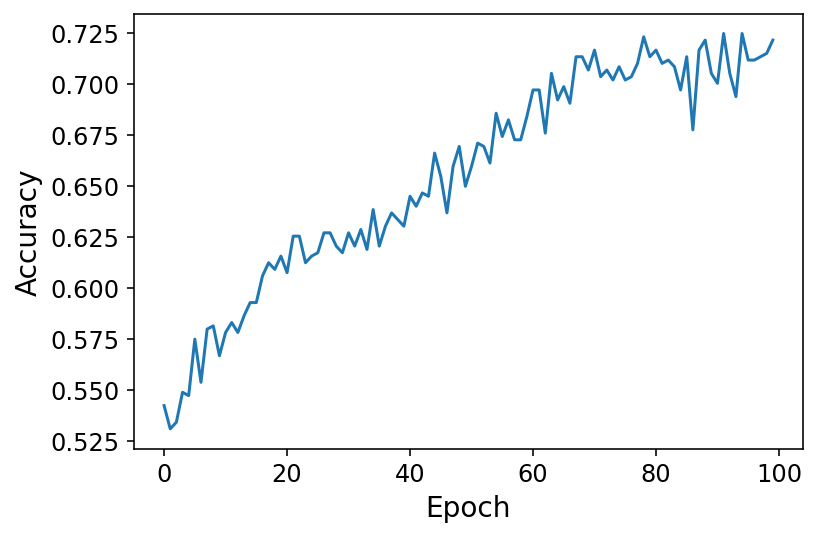

In [41]:
plt.plot(annfitted.history['accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [45]:
annacc = max(annfitted.history['accuracy'])
print('Accuracy: ', annacc)
annprec = max(annfitted.history['precision'])
print('Precision :', annprec)
annrec = max(annfitted.history['recall'])
print('Recall :', annrec)

Accuracy:  0.7247557044029236
Precision : 0.7075471878051758
Recall : 0.5821596384048462


## Model comparison

In [46]:
# create table to compare model metrics
data = [['SVM', svmacc, svmprec, svmrec], ['Logistic Regression', lracc, lrprec, lrrec], ['Decision trees', dtacc,dtprec,dtrec], ['K-Nearest neighbours', knnacc, knnprec, knnrec],['Artificial neural network',annacc,annprec,annrec]]

mcomparison = pd.DataFrame(data, columns = ['Algorithm', 'Accuracy','Precision', 'Recall'])

print(mcomparison)

                   Algorithm  Accuracy  Precision    Recall
0                        SVM  0.766234   0.679245  0.654545
1        Logistic Regression  0.772727   0.685185  0.672727
2             Decision trees  0.766234   0.686275  0.636364
3       K-Nearest neighbours  0.727273   0.627451  0.581818
4  Artificial neural network  0.724756   0.707547  0.582160
